In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load dataset
dataset = pd.read_csv('Food_Inspections.csv')
dataset.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2385628,ALL IN 1 DISCOUNT INC,ALL IN 1 DISCOUNT INC,2744661.0,Grocery Store,Risk 3 (Low),5719-5725 W DIVERSEY AVE,CHICAGO,IL,60639.0,08/03/2020,License,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
1,2385591,HELEN'S GROCERY & LIQ,HELEN'S GROCERY & LIQ,8017.0,Grocery Store,Risk 3 (Low),2300 W 21ST ST,CHICAGO,IL,60608.0,07/31/2020,Canvass,Out of Business,NaN,41.854005,-87.683363,"(-87.6833629225202, 41.8540047775837)"
2,2385590,PETE'S FRESH SUPERMARKET,PETE'S FRESH SUPERMARKET,1771242.0,Grocery Store,Risk 1 (High),2526 W CERMAK RD,CHICAGO,IL,60608.0,07/31/2020,Complaint Re-Inspection,Pass,NaN,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
3,2385587,QUEST FOOD MANAGEMENT SERVICES INC,QUEST FOOD MANAGEMENT SERVICES INC,2744583.0,NaN,Risk 1 (High),3300 N CAMPBELL AVE,CHICAGO,IL,60618.0,07/31/2020,License,Not Ready,NaN,41.941426,-87.690799,"(-87.69079930080058, 41.94142629278533)"
4,2385543,OUTLET KINGDOM,NaN,2054475.0,GENERAL STORE,Risk 3 (Low),3449-3451 S HALSTED ST,CHICAGO,IL,60608.0,07/30/2020,Canvass,Out of Business,NaN,41.831075,-87.645971,"(-87.6459711121892, 41.831074943653626)"


In [3]:
dataset.shape

(208925, 17)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208925 entries, 0 to 208924
Data columns (total 17 columns):
Inspection ID      208925 non-null int64
DBA Name           208925 non-null object
AKA Name           206443 non-null object
License #          208908 non-null float64
Facility Type      204071 non-null object
Risk               208853 non-null object
Address            208925 non-null object
City               208774 non-null object
State              208877 non-null object
Zip                208874 non-null float64
Inspection Date    208925 non-null object
Inspection Type    208924 non-null object
Results            208925 non-null object
Violations         153408 non-null object
Latitude           208237 non-null float64
Longitude          208237 non-null float64
Location           208237 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 27.1+ MB


In [5]:
dataset.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2482
License #             17
Facility Type       4854
Risk                  72
Address                0
City                 151
State                 48
Zip                   51
Inspection Date        0
Inspection Type        1
Results                0
Violations         55517
Latitude             688
Longitude            688
Location             688
dtype: int64

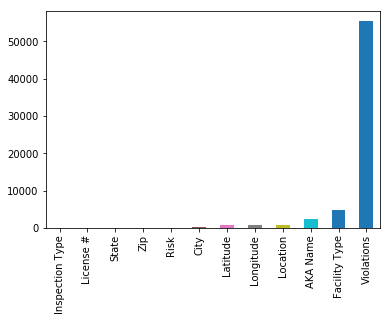

In [6]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
data=dataset.drop(['AKA Name','Inspection ID','License #','Address','Location','Violations'], axis=1)
data.head()

,DBA Name,Facility Type,Risk,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude
0,ALL IN 1 DISCOUNT INC,Grocery Store,Risk 3 (Low),CHICAGO,IL,60639.0,08/03/2020,License,Pass w/ Conditions,41.931121,-87.769554
1,HELEN'S GROCERY & LIQ,Grocery Store,Risk 3 (Low),CHICAGO,IL,60608.0,07/31/2020,Canvass,Out of Business,41.854005,-87.683363
2,PETE'S FRESH SUPERMARKET,Grocery Store,Risk 1 (High),CHICAGO,IL,60608.0,07/31/2020,Complaint Re-Inspection,Pass,41.852101,-87.689051
3,QUEST FOOD MANAGEMENT SERVICES INC,NaN,Risk 1 (High),CHICAGO,IL,60618.0,07/31/2020,License,Not Ready,41.941426,-87.690799
4,OUTLET KINGDOM,GENERAL STORE,Risk 3 (Low),CHICAGO,IL,60608.0,07/30/2020,Canvass,Out of Business,41.831075,-87.645971


In [8]:
data.isnull().sum()

DBA Name              0
Facility Type      4854
Risk                 72
City                151
State                48
Zip                  51
Inspection Date       0
Inspection Type       1
Results               0
Latitude            688
Longitude           688
dtype: int64

In [9]:
df = data.dropna(how='any', subset=['City', 'State','Risk','Inspection Type','Facility Type','Latitude','Longitude'])
df.isnull().sum()

DBA Name           0
Facility Type      0
Risk               0
City               0
State              0
Zip                8
Inspection Date    0
Inspection Type    0
Results            0
Latitude           0
Longitude          0
dtype: int64

In [10]:
df.shape

(203215, 11)

In [11]:
df

,DBA Name,Facility Type,Risk,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude
0,ALL IN 1 DISCOUNT INC,Grocery Store,Risk 3 (Low),CHICAGO,IL,60639.0,08/03/2020,License,Pass w/ Conditions,41.931121,-87.769554
1,HELEN'S GROCERY & LIQ,Grocery Store,Risk 3 (Low),CHICAGO,IL,60608.0,07/31/2020,Canvass,Out of Business,41.854005,-87.683363
2,PETE'S FRESH SUPERMARKET,Grocery Store,Risk 1 (High),CHICAGO,IL,60608.0,07/31/2020,Complaint Re-Inspection,Pass,41.852101,-87.689051
4,OUTLET KINGDOM,GENERAL STORE,Risk 3 (Low),CHICAGO,IL,60608.0,07/30/2020,Canvass,Out of Business,41.831075,-87.645971
5,Chop Suey Huang,Restaurant,Risk 1 (High),CHICAGO,IL,60625.0,07/30/2020,Canvass Re-Inspection,Pass w/ Conditions,41.975976,-87.692494
6,ODYSSEY CHICAGO RIVER,Restaurant,Risk 1 (High),CHICAGO,IL,60611.0,07/27/2020,License,Pass,41.890001,-87.621439
7,BRANDO'S,Restaurant,Risk 2 (Medium),CHICAGO,IL,60604.0,07/28/2020,License,Pass,41.877147,-87.629121
8,O & E FOREVER INC.,Restaurant,Risk 2 (Medium),CHICAGO,IL,60640.0,07/27/2020,Short Form Complaint,Pass,41.978334,-87.668190
9,ALDI STORE #13,Grocery Store,Risk 3 (Low),CHICAGO,IL,60610.0,07/27/2020,License Re-Inspection,Pass,41.903743,-87.634551
10,"WENDY'S PROPERTIES, LLC",Restaurant,Risk 1 (High),CHICAGO,IL,60614.0,07/27/2020,Complaint,Pass w/ Conditions,41.923742,-87.668319


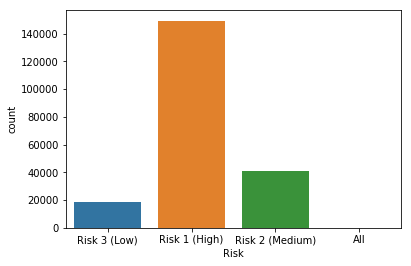

In [12]:
import seaborn as sns
ax = sns.countplot(x="Risk", data=data)

In [13]:
inspections_through_time = data[['Inspection Date', 'Inspection Type', 'Results']]
inspections_through_time

,Inspection Date,Inspection Type,Results
0,08/03/2020,License,Pass w/ Conditions
1,07/31/2020,Canvass,Out of Business
2,07/31/2020,Complaint Re-Inspection,Pass
3,07/31/2020,License,Not Ready
4,07/30/2020,Canvass,Out of Business
5,07/30/2020,Canvass Re-Inspection,Pass w/ Conditions
6,07/27/2020,License,Pass
7,07/28/2020,License,Pass
8,07/27/2020,Short Form Complaint,Pass
9,07/27/2020,License Re-Inspection,Pass


In [14]:
inspections_through_time_aggr = inspections_through_time.groupby(['Inspection Type', 
                                                                  'Results']).size().reset_index(name='counts')

In [15]:
inspections_through_time_aggr

,Inspection Type,Results,counts
0,1315 license reinspection,Fail,1
1,ADDENDUM,Pass,1
2,Business Not Located,Fail,1
3,CANVAS,Pass,1
4,CANVASS,Out of Business,1
5,CANVASS FOR RIB FEST,Pass,1
6,CANVASS RE INSPECTION OF CLOSE UP,Pass,1
7,CANVASS SCHOOL/SPECIAL EVENT,Pass,1
8,CANVASS SPECIAL EVENTS,Pass,1
9,CANVASS/SPECIAL EVENT,Pass,1


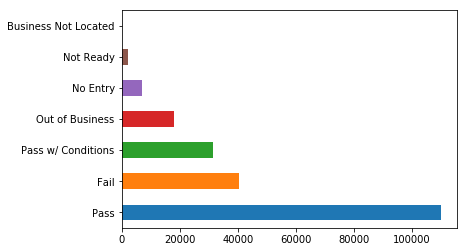

In [16]:
data['Results'].value_counts().head(30).plot(kind='barh')

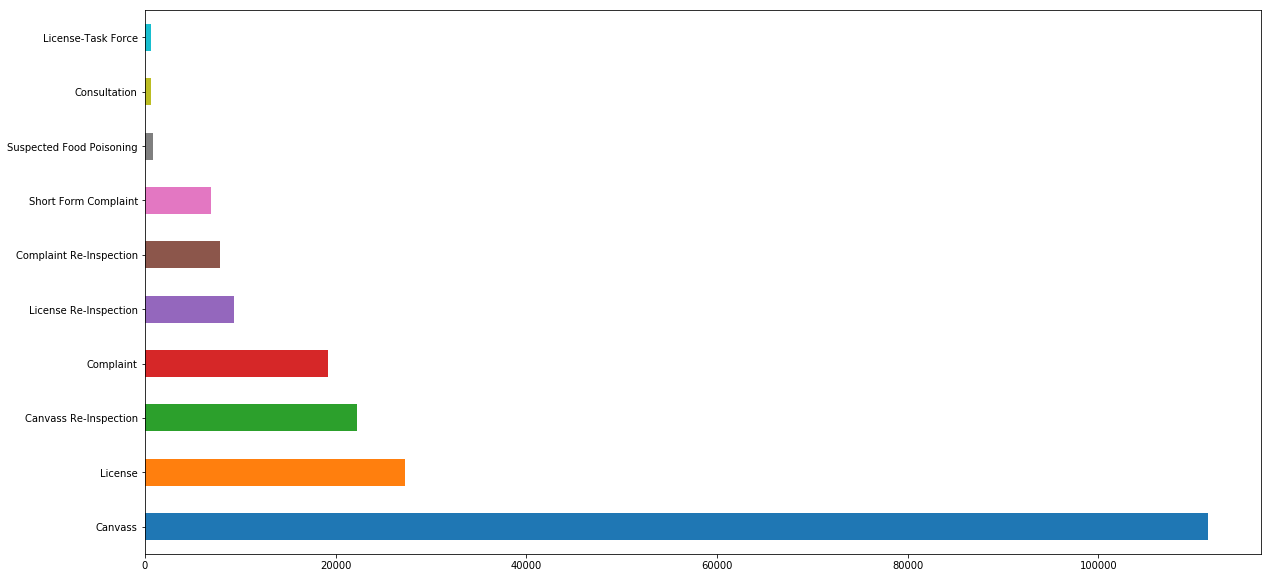

In [17]:
data['Inspection Type'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

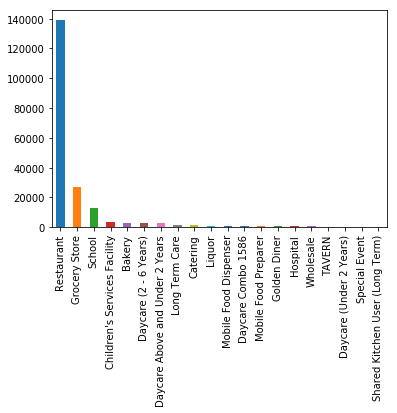

In [18]:
data['Facility Type'].value_counts()[0:20].plot(kind = 'bar')

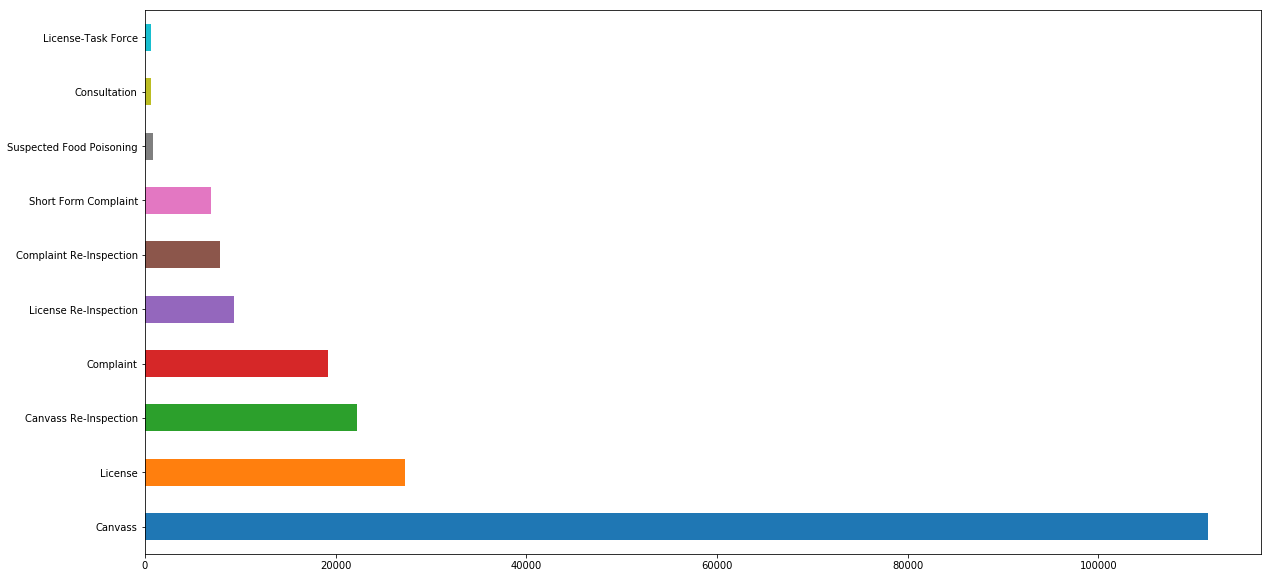

In [19]:
data['Inspection Type'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

In [20]:
data['Inspection Type'].value_counts()

Canvass                                      111454
License                                       27332
Canvass Re-Inspection                         22246
Complaint                                     19165
License Re-Inspection                          9335
Complaint Re-Inspection                        7905
Short Form Complaint                           6974
Suspected Food Poisoning                        873
Consultation                                    671
License-Task Force                              604
Tag Removal                                     603
Recent Inspection                               354
Out of Business                                 284
Task Force Liquor 1475                          252
Suspected Food Poisoning Re-inspection          193
Complaint-Fire                                  161
Short Form Fire-Complaint                       113
Special Events (Festivals)                       63
No Entry                                         60
Package Liqu

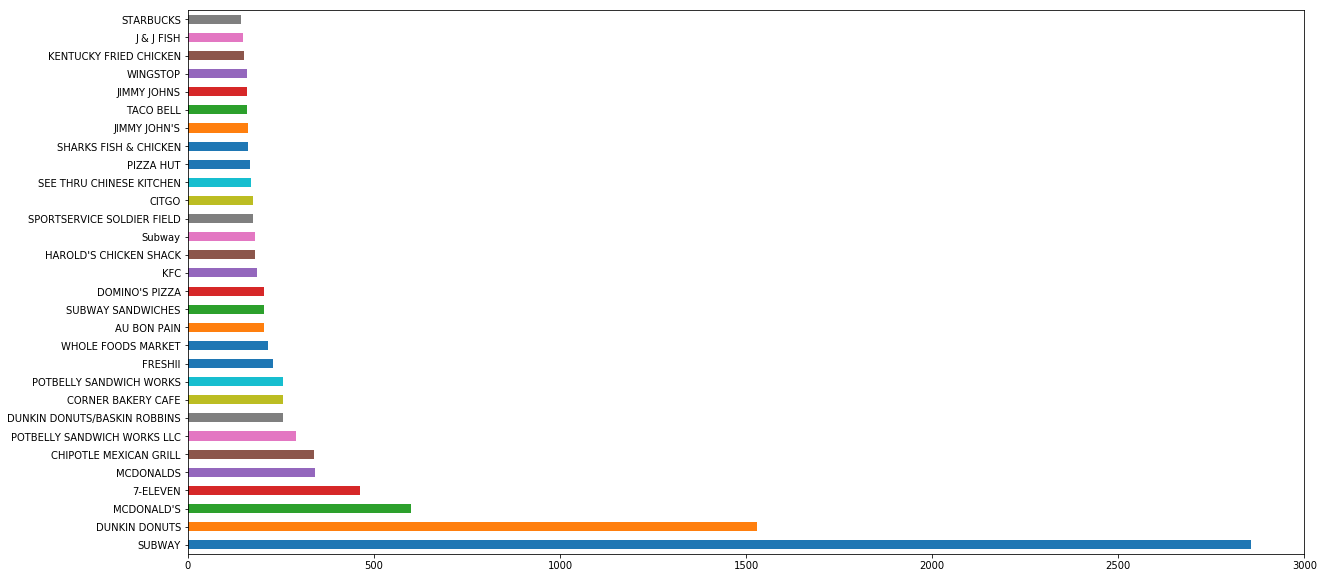

In [21]:
data['DBA Name'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [22]:
F_type_counts = data['Facility Type'].value_counts()
F_type_counts


Restaurant                                         139029
Grocery Store                                       27312
School                                              12828
Children's Services Facility                         3443
Bakery                                               3052
Daycare (2 - 6 Years)                                2767
Daycare Above and Under 2 Years                      2544
Long Term Care                                       1424
Catering                                             1256
Liquor                                                920
Mobile Food Dispenser                                 877
Daycare Combo 1586                                    748
Mobile Food Preparer                                  668
Golden Diner                                          597
Hospital                                              581
Wholesale                                             543
TAVERN                                                304
Daycare (Under

In [23]:
data[data["Inspection Type"] == "Complaint"].shape[0]

19165

# Fail vs Pass

In [24]:
# Create a set of all the fails in each zip code counted up
fail = df[df['Results'] == 'Fail']['Facility Type'].value_counts()

# Sort this failure zip code dataset by the number of failures
fail_Facil = fail.to_frame().sort_values(by=['Facility Type'], ascending=False)
fail_Facil.columns = ['Number of Failures']

# Print it out
fail_Facil.head(10)

,Number of Failures
Restaurant,25803
Grocery Store,6413
School,2507
Bakery,657
Children's Services Facility,594
Daycare (2 - 6 Years),530
Daycare Above and Under 2 Years,447
Liquor,322
Long Term Care,316
Mobile Food Dispenser,230


In [25]:
passes = df[df['Results'] == 'Pass']['Facility Type'].value_counts()

pass_Facil = passes.to_frame().sort_values(by=['Facility Type'], ascending=False)
pass_Facil.columns = ['Number of Passes']

pass_Facil.head(10)

,Number of Passes
Restaurant,72918
Grocery Store,13729
School,8532
Children's Services Facility,2085
Daycare (2 - 6 Years),1689
Daycare Above and Under 2 Years,1628
Bakery,1600
Long Term Care,781
Catering,663
Mobile Food Dispenser,466
